In [21]:
# Import necessary libraries
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
# Define the HDF5 file path
ROOT_DIR = os.path.abspath('..')
file_path = ROOT_DIR + "/data/precipitation/Krige_2016-2019.h5"
NORM = 47.83

Datasets in the file: ['test', 'train']
Shape of dataset: (1557, 18, 8, 64, 64)


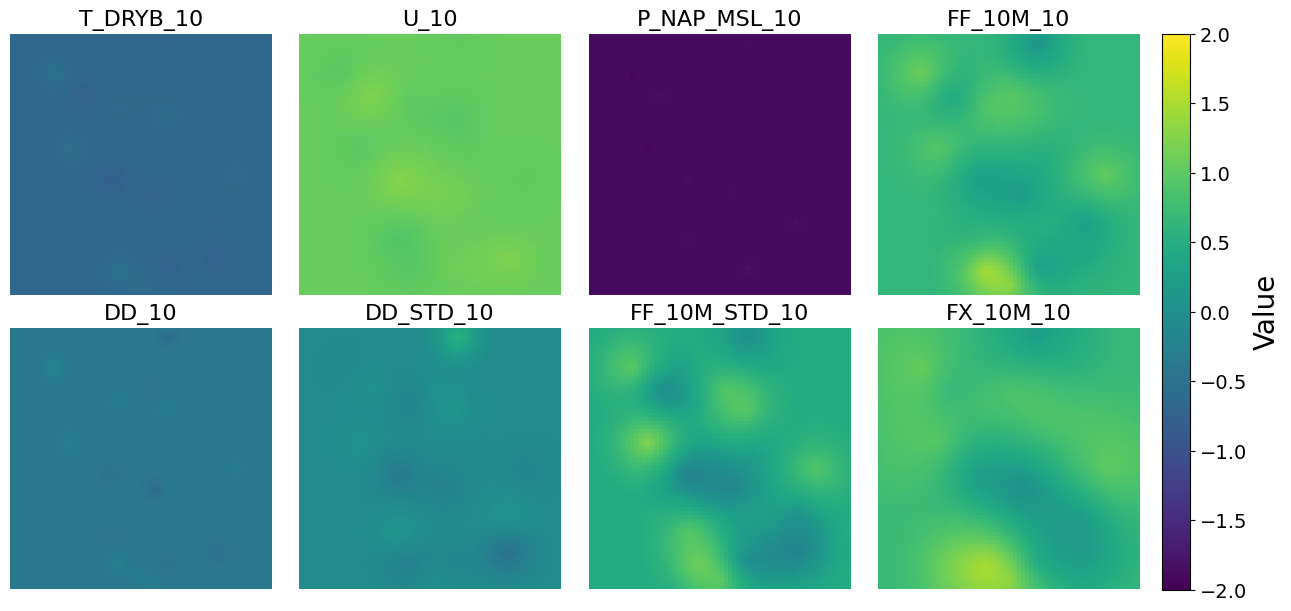

In [89]:
# Open the HDF5 file
with h5py.File(file_path, 'r') as hdf:
    # Print the available datasets to understand the structure
    print("Datasets in the file:", list(hdf.keys()))
    
    # Specify the dataset containing the images
    data = hdf['test']['kriging']
    
    # Check the shape of the dataset
    print("Shape of dataset:", data.shape)
    
    # Set the number of images to display
    num_images = 8
    if data.shape[0] < num_images:
        num_images = data.shape[0]
        print(f"Only {num_images} images available in the dataset.")
    vars = ["T_DRYB_10", "U_10", "P_NAP_MSL_10", "FF_10M_10", "DD_10", "DD_STD_10", "FF_10M_STD_10", "FX_10M_10"]
    
    # Enable constrained layout
    fig, axes = plt.subplots(2, 4, figsize=(13, 6), constrained_layout=True)
    images = data[145][1]
    
    # Determine the global min and max for consistent color scaling
    vmin = -2
    vmax = 2
    
    for i, ax in enumerate(axes.flatten()):
        if i >= num_images:
            ax.axis('off')
            continue
        
        # Select the image
        img = images[i]
        im = ax.imshow(img, cmap='viridis', vmin=vmin, vmax=vmax)  # Use global vmin and vmax
        ax.set_title(f"{vars[i]}", fontsize=16)
        ax.axis('off')
    
    # Add a single color bar for the entire figure
    cbar = fig.colorbar(im, ax=axes, orientation='vertical', shrink=1, pad=0.02)
    cbar.ax.tick_params(labelsize=14) 
    cbar.set_label("Value", fontsize=20)  # Optional label for the color bar
    
    plt.show()
